In [7]:
path='/content/drive/MyDrive/Asad data/covid-19 /archive.zip'

In [8]:
directory_to_extract_to='/content/drive/MyDrive/Asad data/covid-19 /'

In [9]:
import zipfile
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv('/content/drive/MyDrive/Asad data/covid-19 /country_vaccinations.csv')

In [13]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [14]:
df.shape

(66330, 15)

In [15]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
66325,Zimbabwe,ZWE,2021-12-22,7167610.0,4078945.0,3088665.0,15664.0,22030.0,47.49,27.03,20.47,1460.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66326,Zimbabwe,ZWE,2021-12-23,7188128.0,4089315.0,3098813.0,20518.0,18522.0,47.63,27.10,20.53,1227.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66327,Zimbabwe,ZWE,2021-12-24,7200776.0,4095685.0,3105091.0,12648.0,15484.0,47.71,27.14,20.57,1026.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66328,Zimbabwe,ZWE,2021-12-25,7209049.0,4100069.0,3108980.0,8273.0,13872.0,47.77,27.17,20.60,919.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66329,Zimbabwe,ZWE,2021-12-26,7214640.0,4103288.0,3111352.0,5591.0,12994.0,47.80,27.19,20.62,861.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [16]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     31458
people_vaccinated                      32943
people_fully_vaccinated                35556
daily_vaccinations_raw                 37925
daily_vaccinations                       366
total_vaccinations_per_hundred         31458
people_vaccinated_per_hundred          32943
people_fully_vaccinated_per_hundred    35556
daily_vaccinations_per_million           366
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [17]:
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [18]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              66330 non-null  object 
 1   iso_code                             66330 non-null  object 
 2   date                                 66330 non-null  object 
 3   total_vaccinations                   66330 non-null  float64
 4   people_vaccinated                    66330 non-null  float64
 5   people_fully_vaccinated              66330 non-null  float64
 6   daily_vaccinations_raw               66330 non-null  float64
 7   daily_vaccinations                   66330 non-null  float64
 8   total_vaccinations_per_hundred       66330 non-null  float64
 9   people_vaccinated_per_hundred        66330 non-null  float64
 10  people_fully_vaccinated_per_hundred  66330 non-null  float64
 11  daily_vaccinations_per_milli

In [20]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              66330 non-null  object        
 1   iso_code                             66330 non-null  object        
 2   date                                 66330 non-null  datetime64[ns]
 3   total_vaccinations                   66330 non-null  float64       
 4   people_vaccinated                    66330 non-null  float64       
 5   people_fully_vaccinated              66330 non-null  float64       
 6   daily_vaccinations_raw               66330 non-null  float64       
 7   daily_vaccinations                   66330 non-null  float64       
 8   total_vaccinations_per_hundred       66330 non-null  float64       
 9   people_vaccinated_per_hundred        66330 non-null  float64       
 10  people_ful

In [22]:
df.drop(["source_name","source_website"],axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              66330 non-null  object        
 1   iso_code                             66330 non-null  object        
 2   date                                 66330 non-null  datetime64[ns]
 3   total_vaccinations                   66330 non-null  float64       
 4   people_vaccinated                    66330 non-null  float64       
 5   people_fully_vaccinated              66330 non-null  float64       
 6   daily_vaccinations_raw               66330 non-null  float64       
 7   daily_vaccinations                   66330 non-null  float64       
 8   total_vaccinations_per_hundred       66330 non-null  float64       
 9   people_vaccinated_per_hundred        66330 non-null  float64       
 10  people_ful

In [24]:
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
63202,United States,USA,2020-12-13,24147.0,20435.0,4345.0,0.0,0.0,0.01,0.01,0.00,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63203,United States,USA,2020-12-14,28547.0,24696.0,4444.0,4400.0,4400.0,0.01,0.01,0.00,13.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63204,United States,USA,2020-12-15,77567.0,71493.0,4669.0,49020.0,26710.0,0.02,0.02,0.00,80.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63205,United States,USA,2020-12-16,236843.0,225301.0,5096.0,159276.0,70899.0,0.07,0.07,0.00,214.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63206,United States,USA,2020-12-17,508232.0,489577.0,5784.0,271389.0,121021.0,0.15,0.15,0.00,365.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63573,United States,USA,2021-12-19,497402001.0,240791692.0,202813971.0,579412.0,1357692.0,149.82,72.53,61.09,4089.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63574,United States,USA,2021-12-20,498963090.0,241190527.0,203004410.0,1561089.0,1365238.0,150.29,72.65,61.14,4112.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63575,United States,USA,2021-12-21,500063936.0,241472043.0,203143485.0,1100846.0,1295702.0,150.62,72.73,61.19,3903.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63576,United States,USA,2021-12-22,500222328.0,241520559.0,203161937.0,158392.0,1093452.0,150.67,72.75,61.19,3293.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [25]:
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace = True)
df_USA.shape

(376, 13)

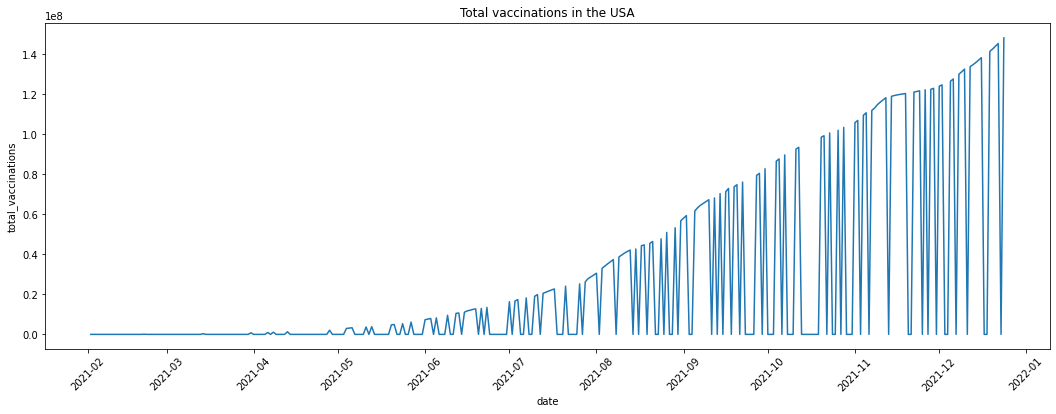

In [26]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df[df["iso_code"] == 'PAK'], x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()

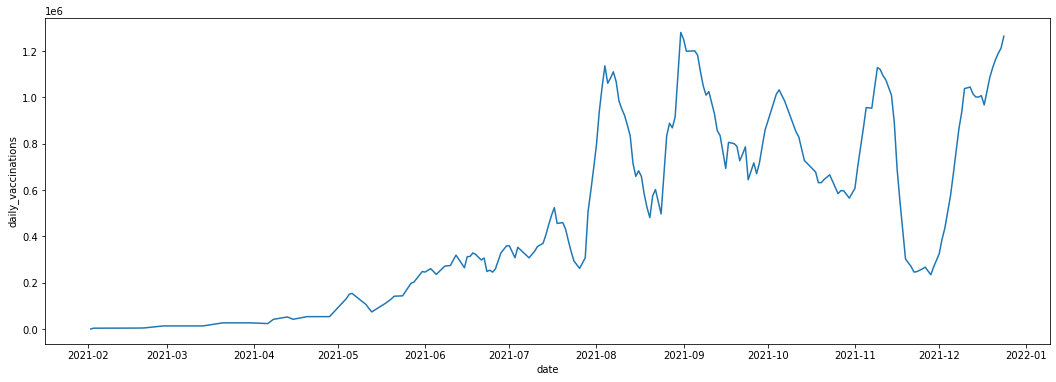

In [27]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df[df["iso_code"] == 'PAK'], x="date", y="daily_vaccinations")

In [28]:
df_PAK = df[df["iso_code"] == 'PAK'].copy()
df_PAK

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
45403,Pakistan,PAK,2021-02-02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45404,Pakistan,PAK,2021-02-03,0.0,0.0,0.0,0.0,3404.0,0.00,0.00,0.00,15.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45405,Pakistan,PAK,2021-02-04,0.0,0.0,0.0,0.0,3404.0,0.00,0.00,0.00,15.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45406,Pakistan,PAK,2021-02-05,0.0,0.0,0.0,0.0,3404.0,0.00,0.00,0.00,15.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45407,Pakistan,PAK,2021-02-06,0.0,0.0,0.0,0.0,3404.0,0.00,0.00,0.00,15.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45724,Pakistan,PAK,2021-12-20,142713705.0,89091860.0,61761440.0,1204366.0,1127955.0,63.37,39.56,27.43,5009.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45725,Pakistan,PAK,2021-12-21,144064235.0,89792114.0,62547553.0,1350530.0,1162968.0,63.97,39.87,27.77,5164.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45726,Pakistan,PAK,2021-12-22,145453360.0,90529877.0,63382390.0,1389125.0,1190441.0,64.59,40.20,28.14,5286.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45727,Pakistan,PAK,2021-12-23,0.0,0.0,0.0,0.0,1213457.0,0.00,0.00,0.00,5388.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."


In [29]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_PAK.drop(df_PAK.index[df_PAK['total_vaccinations'] == 0], inplace = True)

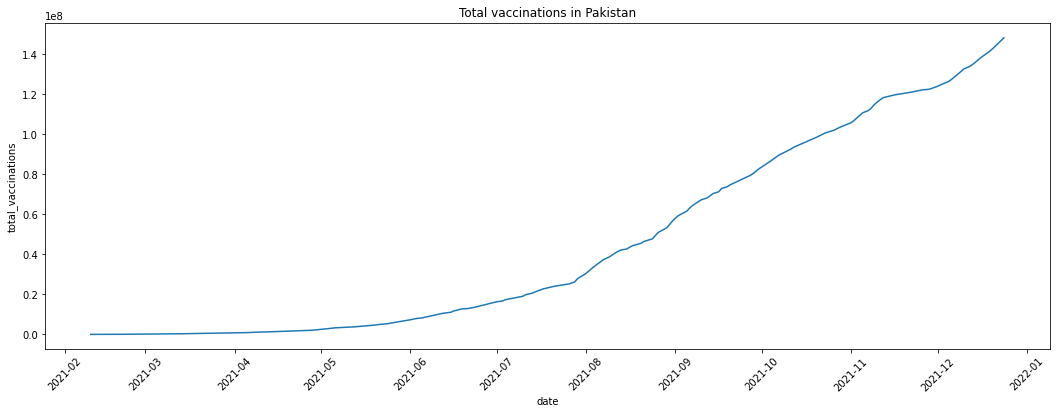

In [30]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_PAK, x="date", y="total_vaccinations")
plt.title("Total vaccinations in Pakistan")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in PAKISTAN')

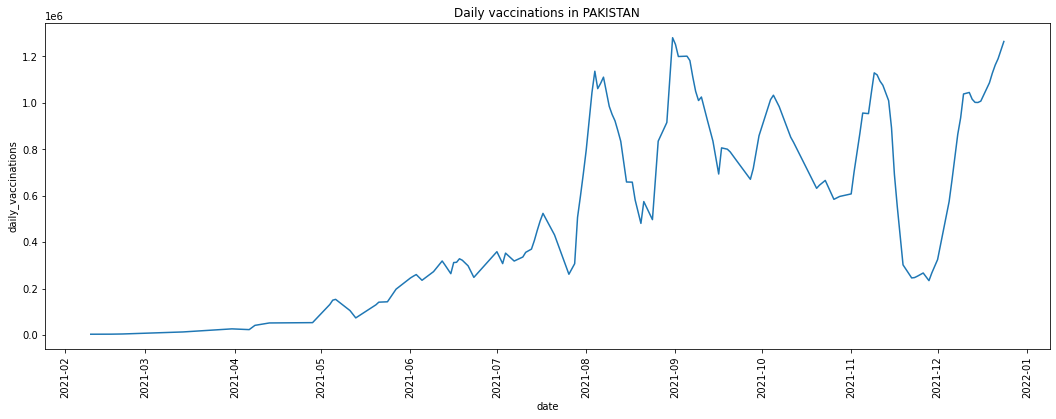

In [31]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_PAK, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in PAKISTAN")

In [32]:
#Group by total vaccinations given by country and sort descending to identify the top 10 countries. 
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,,,,,,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,1.193466e+09,24741000.0,22424286.0,191.77,84.82,82.64,15527.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,5.774373e+08,18627269.0,10037995.0,101.53,60.09,41.44,7204.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,2.031619e+08,4528870.0,3503701.0,150.67,72.75,61.19,10553.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1.428145e+08,3002675.0,1941268.0,153.50,77.52,66.74,9072.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1.106208e+08,3438777.0,1901294.0,96.71,56.68,40.03,6880.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,9.847253e+07,6586453.0,1997542.0,157.97,79.54,78.12,15847.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,7.269910e+07,7246123.0,1648223.0,114.00,62.88,55.81,12653.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,6.514995e+07,1703092.0,1280906.0,65.84,40.89,28.93,5688.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,5.888840e+07,1612890.0,1091256.0,174.75,73.19,70.19,13007.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [33]:
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,,,,,,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,1.193466e+09,24741000.0,22424286.0,191.77,84.82,82.64,15527.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,5.888840e+07,1612890.0,1091256.0,174.75,73.19,70.19,13007.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,9.847253e+07,6586453.0,1997542.0,157.97,79.54,78.12,15847.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1.428145e+08,3002675.0,1941268.0,153.50,77.52,66.74,9072.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,2.031619e+08,4528870.0,3503701.0,150.67,72.75,61.19,10553.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Vietnam,VNM,2021-12-25,1.455954e+08,7.707463e+07,5.638538e+07,2091069.0,1675471.0,148.31,78.51,57.44,17067.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,7.269910e+07,7246123.0,1648223.0,114.00,62.88,55.81,12653.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,5.774373e+08,18627269.0,10037995.0,101.53,60.09,41.44,7204.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1.106208e+08,3438777.0,1901294.0,96.71,56.68,40.03,6880.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


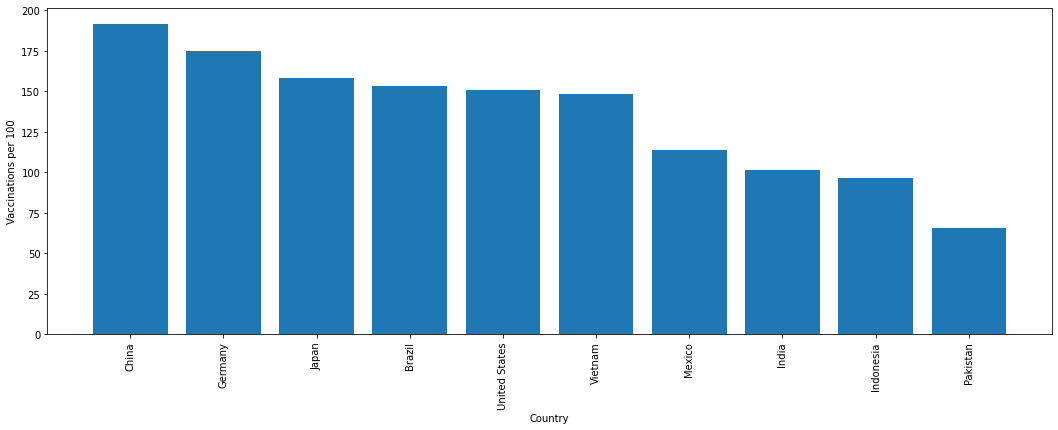

In [37]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)
plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

In [35]:
vacc_by_country.index

Index(['China', 'Germany', 'Japan', 'Brazil', 'United States', 'Vietnam',
       'Mexico', 'India', 'Indonesia', 'Pakistan'],
      dtype='object', name='country')

In [36]:
vacc_by_country.total_vaccinations_per_hundred

country
China            191.77
Germany          174.75
Japan            157.97
Brazil           153.50
United States    150.67
Vietnam          148.31
Mexico           114.00
India            101.53
Indonesia         96.71
Pakistan          65.84
Name: total_vaccinations_per_hundred, dtype: float64

In [39]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:10]
total_vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,,,,,,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,1.193466e+09,24741000.0,22424286.0,191.77,84.82,82.64,15527.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,5.774373e+08,18627269.0,10037995.0,101.53,60.09,41.44,7204.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,2.031619e+08,4528870.0,3503701.0,150.67,72.75,61.19,10553.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1.428145e+08,3002675.0,1941268.0,153.50,77.52,66.74,9072.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1.106208e+08,3438777.0,1901294.0,96.71,56.68,40.03,6880.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,9.847253e+07,6586453.0,1997542.0,157.97,79.54,78.12,15847.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,7.269910e+07,7246123.0,1648223.0,114.00,62.88,55.81,12653.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,6.514995e+07,1703092.0,1280906.0,65.84,40.89,28.93,5688.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,5.888840e+07,1612890.0,1091256.0,174.75,73.19,70.19,13007.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


<BarContainer object of 10 artists>

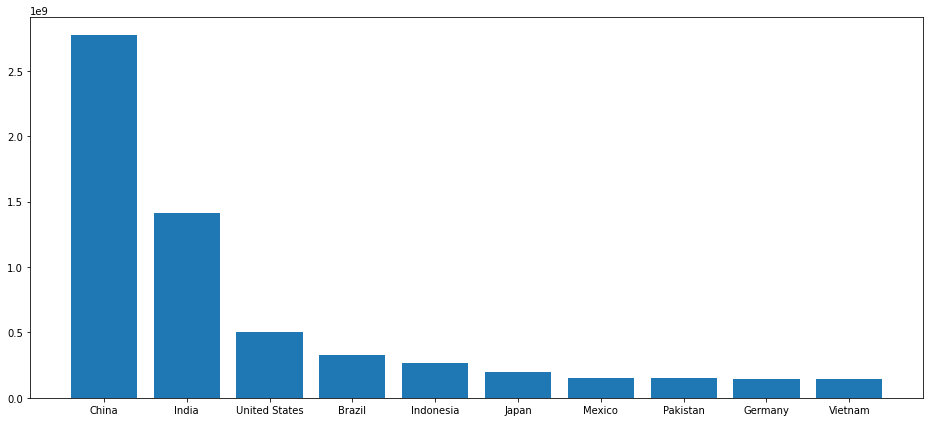

In [40]:
plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)


In [41]:
#Sort by total vaccinations delivered by countries and group by vaccines. 
vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
vaccines,,,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,1.193466e+09,24741000.0,22424286.0,191.77,84.82,82.64,15527.0
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,5.774373e+08,18627269.0,10037995.0,101.53,60.09,41.44,7204.0
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,2.031619e+08,4528870.0,3503701.0,201.69,82.29,78.03,23259.0
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1.428145e+08,3002675.0,1941268.0,153.50,77.52,66.74,9072.0
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1.106208e+08,3438777.0,1901294.0,96.71,56.68,40.03,6880.0


In [42]:
#Get the top 10 vaccines by country for easy plotting
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
vaccines,,,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,1.193466e+09,24741000.0,22424286.0,191.77,84.82,82.64,15527.0
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,5.774373e+08,18627269.0,10037995.0,101.53,60.09,41.44,7204.0
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,2.031619e+08,4528870.0,3503701.0,201.69,82.29,78.03,23259.0
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1.428145e+08,3002675.0,1941268.0,153.50,77.52,66.74,9072.0
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1.106208e+08,3438777.0,1901294.0,96.71,56.68,40.03,6880.0
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,9.847253e+07,6586453.0,1997542.0,205.38,83.11,78.12,69641.0
"CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,7.269910e+07,7246123.0,1648223.0,114.00,62.88,55.81,12653.0
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,6.514995e+07,1703092.0,1280906.0,65.84,40.89,28.93,5688.0
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,5.888840e+07,1612890.0,1091256.0,208.04,90.28,89.31,21977.0


In [43]:
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,1.193466e+09,24741000.0,22424286.0,191.77,84.82,82.64,15527.0
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,5.774373e+08,18627269.0,10037995.0,101.53,60.09,41.44,7204.0
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,2.031619e+08,4528870.0,3503701.0,201.69,82.29,78.03,23259.0
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1.428145e+08,3002675.0,1941268.0,153.50,77.52,66.74,9072.0
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1.106208e+08,3438777.0,1901294.0,96.71,56.68,40.03,6880.0
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,9.847253e+07,6586453.0,1997542.0,205.38,83.11,78.12,69641.0
6,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,7.269910e+07,7246123.0,1648223.0,114.00,62.88,55.81,12653.0
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,6.514995e+07,1703092.0,1280906.0,65.84,40.89,28.93,5688.0
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,5.888840e+07,1612890.0,1091256.0,208.04,90.28,89.31,21977.0
9,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2021-12-25,1.455954e+08,7.707463e+07,5.638538e+07,2091069.0,1675471.0,148.31,78.51,57.44,17067.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

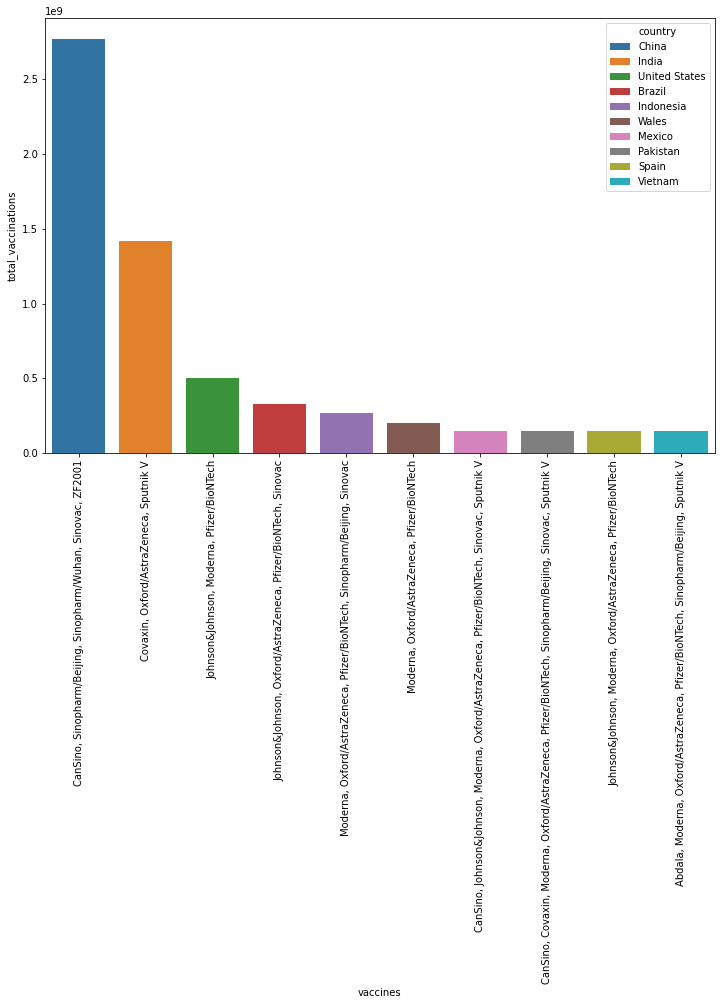

In [44]:
plt.figure(figsize=(12,8))

sns.barplot(data = vacc_names_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

In [45]:
fig = px.choropleth(df.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  #No margin on left, right, top and bottom
fig.show()